<a href="https://colab.research.google.com/github/Shiva-Gangadhar/Face-Mask-Detection-System/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [2]:
from zipfile import ZipFile
# dataset = '/content/face-mask-dataset.zip'
dataset = '/content/Total_Data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()

print('The dataset is extracted')

The dataset is extracted


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
# with_mask_files = os.listdir('/content/data/with_mask')
# without_mask_files = os.listdir('/content/data/without_mask')
with_mask_files = os.listdir('/content/Total_Data/with_mask')
without_mask_files = os.listdir('/content/Total_Data/without_mask')

In [5]:
print(with_mask_files[0:5])
print(without_mask_files[0:5])

['with_mask_2275.jpg', 'with_mask_2168.jpg', 'with_mask_3064.jpg', 'with_mask_1091.jpg', 'with_mask_290.jpg']
['0_0_maolinlin_0040.jpg', 'without_mask_3322.jpg', 'without_mask_2356.jpg', 'without_mask_126.jpg', 'without_mask_2579.jpg']


In [6]:
print(with_mask_files[-5:])
print(without_mask_files[-5:])

['with_mask_1434.jpg', 'with_mask_2163.jpg', '160.jpg', 'with_mask_2474.jpg', '0_0_b5ab5af2jw1evkel6ye78j20m80xcqhy.jpg']
['without_mask_2400.jpg', '160.jpg', 'without_mask_761.jpg', 'without_mask_1344.jpg', 'without_mask_2677.jpg']


In [7]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 4725
Number of without mask images: 4337


In [8]:
with_mask_labels = [1]*4725
without_mask_labels = [0]*4337

In [9]:
labels = with_mask_labels + without_mask_labels

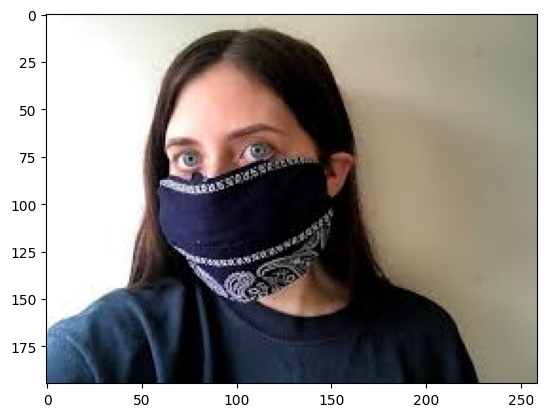

In [10]:
img = mpimg.imread('/content/Total_Data/with_mask/with_mask_3689.jpg')
imgplot = plt.imshow(img)
plt.show()

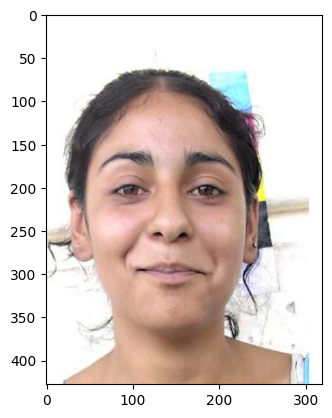

In [11]:
img = mpimg.imread('/content/Total_Data/without_mask/without_mask_1183.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [12]:
with_mask_path = '/content/Total_Data/with_mask/'
IMAGE_SIZE=224
data =[]

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/Total_Data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((IMAGE_SIZE,IMAGE_SIZE))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
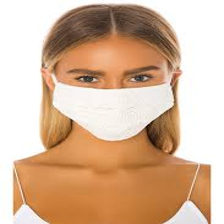

In [13]:
data[0]

In [14]:
data[0].shape

(224, 224, 3)

In [15]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [16]:
print(X.shape)
print(Y.shape)

(9062, 224, 224, 3)
(9062,)


**Train Test Split**

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(9062, 224, 224, 3) (7249, 224, 224, 3) (1813, 224, 224, 3)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

**Building a Convolutional Neural Networks(CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.layers import BatchNormalization

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(layers.Conv2D(32, kernel_size=(19,19),activation='relu',input_shape=(128,128,3)))
# model.add(layers.Conv2D(32, kernel_size=(19,19),activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(19,19),activation='relu'))
# model.add(layers.Conv2D(64, kernel_size=(19,19),activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_of_classes,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
# from tensorflow.keras.optimizers import AdamW

# optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=15)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test accuracy =',accuracy)

In [ ]:
h = history

plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_prediction_label = np.argmax(input_prediction)

print(input_prediction_label)

if input_prediction_label ==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

**Implementing RealTime face capture through cam**

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
cap = cv2.VideoCapture(0)

In [ ]:
IMAGE_SIZE =128


while True:
  ret, frame = cap.read()

  if not ret:
    print("Camera is not working")
    break;

  #convert to grayscale for face detection
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  #Detect Faces
  faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

  for (x,y,w,h) in faces:
    #Extract face region
    face_image = frame[y:y+h,x:x+w]

    #resize the image for model
    face_image_scaled = cv2.resize(face_image,(IMAGE_SIZE,IMAGE_SIZE))
    face_image_normalized = face_image_scaled/255.0
    face_image_input = np.reshape(face_image_normalized,(1,IMAGE_SIZE,IMAGE_SIZE,3))

    #predict mask/No mask
    prediction = model.predict(face_image_input)
    label_index = np.argmax(prediction)

    label = "Mask" if label_index==1 else "No Mask"
    color = (0,255,0) if label_index == 1 else (0,0,255)

    #Draw Bounding Box for face
    cv2.rectangle(frame,(x,y),(x+w,y+h),color,2)
    cv2.putText(frame,label,(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,color,2)

  cv2.imshow("Real Time Face Mask Detection",frame)

  # Exit on pressing 'q'
  if cv2.waitKey(1) & 0xFF == ord('q'):
      break

# Cleanup
cap.release()
cv2.destroyAllWindows()

In [ ]:
model.save("face_mask.h5")